# Importing dependencies and importing the csv file with keyword data from each Emeritus topic combined

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

keywordsfull = pd.read_csv('keywordsfull.csv')
keywordsfull

,Keyword,Topic
0,online schools,Product Design and Innovation
1,online certificate programs,Product Design and Innovation
2,online universities,Product Design and Innovation
3,diploma certificate,Product Design and Innovation
4,online courses with certificate,Product Design and Innovation
...,...,...
3768,diploma certificate in education,Human Resources
3769,courses certificate online,Human Resources
3770,diploma in data science online course,Human Resources
3771,diploma courses in online,Human Resources


In [3]:
noduplicates = keywordsfull.drop_duplicates(subset=['Keyword'])
noduplicates

,Keyword,Topic
0,online schools,Product Design and Innovation
1,online certificate programs,Product Design and Innovation
2,online universities,Product Design and Innovation
3,diploma certificate,Product Design and Innovation
4,online courses with certificate,Product Design and Innovation
...,...,...
3755,diploma in hr online course,Human Resources
3757,humanities courses online,Human Resources
3763,certification courses in hr online,Human Resources
3764,hr management diploma courses,Human Resources


In [4]:
#taking a random sample of the keywords to be under the 700 keyword limit per call in DataForSEO
samplekeywords = keywordsfull.sample(frac=0.185,random_state=200)
samplekeywords.reset_index(drop=True)


,Keyword,Topic
0,online tech certifications,Technology
1,diploma course in data science,Healthcare
2,kellogg marketing certificate,Digital Marketing
3,emeritus login,Leadership
4,digitalization courses,Finance
...,...,...
693,executive education digital strategy,Digital Transformation
694,design innovation certificate,Strategy and Innovation
695,seo and digital marketing course,Digital Marketing
696,data science and analytics courses,Healthcare


In [5]:
#storing the random sample of keywords in a list to call in the API
keywordlist = list(samplekeywords['Keyword'])

keywordlist

['online tech certifications',
 'diploma course in data science',
 'kellogg marketing certificate',
 'emeritus login',
 'digitalization courses',
 'machine learning course',
 'emeritus certificate',
 'masters in data science',
 'finance classes online',
 'leadership and management in education courses',
 'marketable certificate courses',
 'mit digital transformation online course',
 'certificate in business analytics',
 'human resource management online course',
 'mit sloan executive certificate in strategy and innovation',
 'emeritus diploma',
 'uc berkeley online certificate',
 'engineering certificate courses',
 'online data science phd',
 'learning programs online',
 'emeritus education',
 'online degree courses',
 'finance diploma',
 'grad cert data science',
 'online business courses with certificates',
 'online diploma certificate courses',
 'pg diploma business analytics',
 'it online certificate programs',
 'about project management course',
 'it management courses online',
 '

# Using code from DataForSeo documentation to make API calls for the list of keywords

In [7]:
from client import RestClient

client = RestClient("regana.alicka@gmail.com", "14e8e7194949b81c")
post_data = dict()
# simple way to set a task
post_data[len(post_data)] = dict(
    #location_name="United States",
    #language_name="English",
    keywords=keywordlist
)
# POST /v3/keywords_data/google/search_volume/live
# the full list of possible parameters is available in documentation
response = client.post("/v3/keywords_data/google/search_volume/live", post_data)
# you can find the full list of the response codes here https://docs.dataforseo.com/v3/appendix/errors
if response["status_code"] == 20000:
    print(response)
    # do something with result
else:
    print("error. Code: %d Message: %s" % (response["status_code"], response["status_message"]))

{'version': '0.1.20210818', 'status_code': 20000, 'status_message': 'Ok.', 'time': '3.7921 sec.', 'cost': 0.075, 'tasks_count': 1, 'tasks_error': 0, 'tasks': [{'id': '08230904-3033-0093-0000-048b3849d2d4', 'status_code': 20000, 'status_message': 'Ok.', 'time': '3.5797 sec.', 'cost': 0.075, 'result_count': 612, 'path': ['v3', 'keywords_data', 'google', 'search_volume', 'live'], 'data': {'api': 'keywords_data', 'function': 'search_volume', 'se': 'google', 'keywords': ['online tech certifications', 'diploma course in data science', 'kellogg marketing certificate', 'emeritus login', 'digitalization courses', 'machine learning course', 'emeritus certificate', 'masters in data science', 'finance classes online', 'leadership and management in education courses', 'marketable certificate courses', 'mit digital transformation online course', 'certificate in business analytics', 'human resource management online course', 'mit sloan executive certificate in strategy and innovation', 'emeritus dipl

In [8]:
response

{'version': '0.1.20210818',
 'status_code': 20000,
 'status_message': 'Ok.',
 'time': '3.7921 sec.',
 'cost': 0.075,
 'tasks_count': 1,
 'tasks_error': 0,
 'tasks': [{'id': '08230904-3033-0093-0000-048b3849d2d4',
   'status_code': 20000,
   'status_message': 'Ok.',
   'time': '3.5797 sec.',
   'cost': 0.075,
   'result_count': 612,
   'path': ['v3', 'keywords_data', 'google', 'search_volume', 'live'],
   'data': {'api': 'keywords_data',
    'function': 'search_volume',
    'se': 'google',
    'keywords': ['online tech certifications',
     'diploma course in data science',
     'kellogg marketing certificate',
     'emeritus login',
     'digitalization courses',
     'machine learning course',
     'emeritus certificate',
     'masters in data science',
     'finance classes online',
     'leadership and management in education courses',
     'marketable certificate courses',
     'mit digital transformation online course',
     'certificate in business analytics',
     'human resourc

In [9]:
#looking at keys in this nested dictionary to find useful data
print(response.keys())


dict_keys(['version', 'status_code', 'status_message', 'time', 'cost', 'tasks_count', 'tasks_error', 'tasks'])


In [10]:
#visualizing the json in a dataframe format

In [11]:
pd.json_normalize(response)


,version,status_code,status_message,time,cost,tasks_count,tasks_error,tasks
0,0.1.20210818,20000,Ok.,3.7921 sec.,0.075,1,0,[{'id': '08230904-3033-0093-0000-048b3849d2d4'...


In [12]:
#expanding "tasks"
response2 = response["tasks"]
pd.json_normalize(response2)


,id,status_code,status_message,time,cost,result_count,path,result,data.api,data.function,data.se,data.keywords
0,08230904-3033-0093-0000-048b3849d2d4,20000,Ok.,3.5797 sec.,0.075,612,"[v3, keywords_data, google, search_volume, live]","[{'keyword': 'online tech certifications', 'lo...",keywords_data,search_volume,google,"[online tech certifications, diploma course in..."


In [13]:
response3 = response2[0]
pd.json_normalize(response3)


,id,status_code,status_message,time,cost,result_count,path,result,data.api,data.function,data.se,data.keywords
0,08230904-3033-0093-0000-048b3849d2d4,20000,Ok.,3.5797 sec.,0.075,612,"[v3, keywords_data, google, search_volume, live]","[{'keyword': 'online tech certifications', 'lo...",keywords_data,search_volume,google,"[online tech certifications, diploma course in..."


In [14]:
response4 = response3["result"]
pd.json_normalize(response4)


,keyword,location_code,language_code,search_partners,competition,cpc,search_volume,categories,monthly_searches
0,online tech certifications,None,None,False,0.810105,18.585468,140,"[10016, 10141, 10752, 10758, 10763]","[{'year': 2021, 'month': 7, 'search_volume': 1..."
1,diploma course in data science,None,None,False,0.842365,2.059116,90,None,"[{'year': 2021, 'month': 7, 'search_volume': 1..."
2,kellogg marketing certificate,None,None,False,0.593651,16.642581,40,None,"[{'year': 2021, 'month': 7, 'search_volume': 4..."
3,emeritus login,None,None,False,0.003016,0.015350,880,"[10007, 10011, 10016, 10085, 10091, 10141, 104...","[{'year': 2021, 'month': 7, 'search_volume': 8..."
4,digitalization courses,None,None,False,0.505752,2.658112,2400,None,"[{'year': 2021, 'month': 7, 'search_volume': 1..."
...,...,...,...,...,...,...,...,...,...
607,get a diploma online,None,None,False,0.774635,12.242013,320,"[10002, 10016, 10030, 10141, 10236, 10752, 107...","[{'year': 2021, 'month': 7, 'search_volume': 3..."
608,executive education digital strategy,None,None,False,0.544850,10.706332,40,None,"[{'year': 2021, 'month': 7, 'search_volume': 4..."
609,design innovation certificate,None,None,False,0.184466,6.676483,50,None,"[{'year': 2021, 'month': 7, 'search_volume': 1..."
610,seo and digital marketing course,None,None,False,0.502952,7.673140,110,None,"[{'year': 2021, 'month': 7, 'search_volume': 1..."


In [15]:
#looking at keys contained within the "monthly-searches" key

In [16]:
response4[0]['monthly_searches']

[{'year': 2021, 'month': 7, 'search_volume': 170},
 {'year': 2021, 'month': 6, 'search_volume': 140},
 {'year': 2021, 'month': 5, 'search_volume': 140},
 {'year': 2021, 'month': 4, 'search_volume': 110},
 {'year': 2021, 'month': 3, 'search_volume': 90},
 {'year': 2021, 'month': 2, 'search_volume': 90},
 {'year': 2021, 'month': 1, 'search_volume': 90},
 {'year': 2020, 'month': 12, 'search_volume': 110},
 {'year': 2020, 'month': 11, 'search_volume': 140},
 {'year': 2020, 'month': 10, 'search_volume': 140},
 {'year': 2020, 'month': 9, 'search_volume': 140},
 {'year': 2020, 'month': 8, 'search_volume': 210}]

In [17]:
pd.json_normalize(
    response4, 
    record_path =['monthly_searches'],
    record_prefix='record-'
)

,record-year,record-month,record-search_volume
0,2021,7,170
1,2021,6,140
2,2021,5,140
3,2021,4,110
4,2021,3,90
...,...,...,...
7339,2020,12,480
7340,2020,11,480
7341,2020,10,480
7342,2020,9,390


In [18]:
#creating a flattened dataframe from the original nested structure

In [151]:
p5 = pd.json_normalize(
    response4, 
    record_path =['monthly_searches'], 
    meta=['keyword', 'competition', 'cpc','search_volume', ['year', 'month', 'search_volume']],
    record_prefix='record-',
    errors='ignore'
)

p5.head()


,record-year,record-month,record-search_volume,keyword,competition,cpc,search_volume,year.month.search_volume
0,2021,7,170,online tech certifications,0.810105,18.585468,140,NaN
1,2021,6,140,online tech certifications,0.810105,18.585468,140,NaN
2,2021,5,140,online tech certifications,0.810105,18.585468,140,NaN
3,2021,4,110,online tech certifications,0.810105,18.585468,140,NaN
4,2021,3,90,online tech certifications,0.810105,18.585468,140,NaN


In [152]:
df=p5[["keyword", "search_volume", "record-year","record-month","record-search_volume","competition","cpc"]]
df.head()

,keyword,search_volume,record-year,record-month,record-search_volume,competition,cpc
0,online tech certifications,140,2021,7,170,0.810105,18.585468
1,online tech certifications,140,2021,6,140,0.810105,18.585468
2,online tech certifications,140,2021,5,140,0.810105,18.585468
3,online tech certifications,140,2021,4,110,0.810105,18.585468
4,online tech certifications,140,2021,3,90,0.810105,18.585468


In [153]:
#combining year and month columns

In [154]:
df[["record-year", "record-month"]] = df[["record-year", "record-month"]].astype(str) 

df["Date"] = df["record-year"] +"-"+ df["record-month"]
df = df.drop(columns=['record-year', 'record-month'])
df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,keyword,search_volume,record-search_volume,competition,cpc,Date
0,online tech certifications,140,170,0.810105,18.585468,2021-7
1,online tech certifications,140,140,0.810105,18.585468,2021-6
2,online tech certifications,140,140,0.810105,18.585468,2021-5
3,online tech certifications,140,110,0.810105,18.585468,2021-4
4,online tech certifications,140,90,0.810105,18.585468,2021-3


In [155]:
df = df.rename(columns={"keyword": "Keyword", "search_volume": "Average Search Volume (per Month)", "record-search_volume":"Total Monthly Search Volume","competition":"Competition", "cpc":"Cost Per Click"})
df = df[["Keyword", "Average Search Volume (per Month)", "Date","Total Monthly Search Volume","Competition","Cost Per Click"]]
df

,Keyword,Average Search Volume (per Month),Date,Total Monthly Search Volume,Competition,Cost Per Click
0,online tech certifications,140,2021-7,170,0.810105,18.585468
1,online tech certifications,140,2021-6,140,0.810105,18.585468
2,online tech certifications,140,2021-5,140,0.810105,18.585468
3,online tech certifications,140,2021-4,110,0.810105,18.585468
4,online tech certifications,140,2021-3,90,0.810105,18.585468
...,...,...,...,...,...,...
7339,data science and analytics courses,590,2020-12,480,0.738183,6.162221
7340,data science and analytics courses,590,2020-11,480,0.738183,6.162221
7341,data science and analytics courses,590,2020-10,480,0.738183,6.162221
7342,data science and analytics courses,590,2020-9,390,0.738183,6.162221


In [156]:
#adding Topic names that correlate with the keyword back into the dataframe

In [157]:
newdf = df.join(samplekeywords.set_index('Keyword'), on='Keyword')
newdf

,Keyword,Average Search Volume (per Month),Date,Total Monthly Search Volume,Competition,Cost Per Click,Topic
0,online tech certifications,140,2021-7,170,0.810105,18.585468,Technology
1,online tech certifications,140,2021-6,140,0.810105,18.585468,Technology
2,online tech certifications,140,2021-5,140,0.810105,18.585468,Technology
3,online tech certifications,140,2021-4,110,0.810105,18.585468,Technology
4,online tech certifications,140,2021-3,90,0.810105,18.585468,Technology
...,...,...,...,...,...,...,...
7339,data science and analytics courses,590,2020-12,480,0.738183,6.162221,Healthcare
7340,data science and analytics courses,590,2020-11,480,0.738183,6.162221,Healthcare
7341,data science and analytics courses,590,2020-10,480,0.738183,6.162221,Healthcare
7342,data science and analytics courses,590,2020-9,390,0.738183,6.162221,Healthcare


In [158]:
newdf.describe()

,Total Monthly Search Volume
count,8376.000000
mean,1653.511223
std,9772.279421
min,0.000000
25%,40.000000
50%,110.000000
75%,480.000000
max,201000.000000


In [159]:
#in this cell, monthly search volumes are summed to get the total searches from the past year
#keyword, topic, and competition columns are also isolated
#in this context, the competition metric "represents the relative amount of competition associated with the given keyword in paid SERP only. This value is based on Google Ads data and can be between 0 and 1 (inclusive)."
sumsdf = newdf.groupby(["Keyword", "Topic", "Competition"]).sum()["Total Monthly Search Volume"]

sumsdf

Keyword                                                Topic                          Competition
2021 online courses                                    Strategy and Innovation        0.680272        310
6 months online diploma courses                        Leadership                     0.700830       4240
                                                       Product Design and Innovation  0.700830       4240
about coding class                                     Coding                         0.595687       1300
about data analyst course                              Data Science and Analytics     0.595642        290
                                                                                                     ... 
ux design diploma                                      Product Design and Innovation  0.729495       3030
ux design professional certificate                     Product Design and Innovation  0.654018        590
ux designer certificate                               

In [160]:
sumsdf = pd.DataFrame(sumsdf)
sumsdf


Total Monthly Search Volume
Keyword                                            Topic                         Competition                             
2021 online courses                                Strategy and Innovation       0.680272                             310
6 months online diploma courses                    Leadership                    0.700830                            4240
                                                   Product Design and Innovation 0.700830                            4240
about coding class                                 Coding                        0.595687                            1300
about data analyst course                          Data Science and Analytics    0.595642                             290
...                                                                                                                   ...
ux design diploma                                  Product Design and Innovation 0.729495                            3030
ux design professional certificate                 Product Design and Innovation 0.654018                             590
ux designer certificate                            Product Design and Innovation 0.808876                            5150
ux diploma                                         Product Design and Innovation 0.735986                            1960
wharton leadership and management certificate p... Leadership                    0.596273                             370

[698 rows x 1 columns]

In [161]:
sumsdf = sumsdf.reset_index()

In [162]:
sumsdf2 = sumsdf.drop_duplicates(subset='Keyword', keep="first")
sumsdf2

,Keyword,Topic,Competition,Total Monthly Search Volume
0,2021 online courses,Strategy and Innovation,0.680272,310
1,6 months online diploma courses,Leadership,0.700830,4240
3,about coding class,Coding,0.595687,1300
4,about data analyst course,Data Science and Analytics,0.595642,290
5,about digital marketing course,Digital Marketing,0.639373,4680
...,...,...,...,...
693,ux design diploma,Product Design and Innovation,0.729495,3030
694,ux design professional certificate,Product Design and Innovation,0.654018,590
695,ux designer certificate,Product Design and Innovation,0.808876,5150
696,ux diploma,Product Design and Innovation,0.735986,1960


In [163]:
#using scipy to remove outliers

In [164]:
from scipy import stats
sumsdf3 = sumsdf2[(np.abs(stats.zscore(sumsdf2["Total Monthly Search Volume"])) < 5)]
sumsdf3.head()

,Keyword,Topic,Competition,Total Monthly Search Volume
0,2021 online courses,Strategy and Innovation,0.680272,310
1,6 months online diploma courses,Leadership,0.700830,4240
3,about coding class,Coding,0.595687,1300
4,about data analyst course,Data Science and Analytics,0.595642,290
5,about digital marketing course,Digital Marketing,0.639373,4680


In [165]:
#the top 40 most searched for topics are isolated.

top40=sumsdf3.nlargest(40, ['Total Monthly Search Volume'])
top40 = top40.reset_index(drop=True)
top40

,Keyword,Topic,Competition,Total Monthly Search Volume
0,online certification courses,Coding,0.736632,452600
1,online courses with certificate,Product Design and Innovation,0.736632,452600
2,masters in data science,Data Science and Analytics,0.797701,412000
3,course of business management,Finance,0.595765,389400
4,courses in business management,Business Management,0.595765,389400
5,digital marketing online course,Sales and Marketing,0.772362,282200
6,coding courses,Coding,0.521308,255700
7,course of designing,Product Design and Innovation,0.346076,237700
8,machine learning course,Artificial Intelligence and Machine Learning,0.721922,237700
9,certificate in business analytics,Finance,0.762792,221300


# GRAPHS

In [166]:
top40.rename(columns = {"Total Monthly Search Volume": "SearchVolume"}, inplace=True)

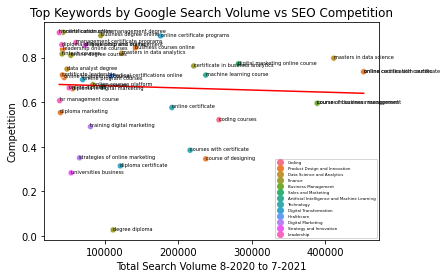

In [178]:
import exp
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots()

#creating scatterplot with Competition coefficient on the x-axis, total search volume for the data period on the y-axis,
#and with color coded points corresponding to the Emeritus topic the keyword was generated from
sns.scatterplot(data=top40, x="SearchVolume", y="Competition", hue="Topic")

plt.legend(loc="best", fontsize=4, fancybox=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 6})
plt.title("Top Keywords by Google Search Volume vs SEO Competition")
plt.xlabel("Total Search Volume 8-2020 to 7-2021")
plt.ylabel("Competition")
#plt.ylim([30000, 200000])
#plt.figure(figsize=(8,5)) 

#setting up labels for each plot point
for i in range(top40.shape[0]):
    plt.text(x=top40.SearchVolume[i],y=top40.Competition[i],s=top40.Keyword[i],
            fontdict=dict(size=5))
    
#finding slope and intercept for linear regression, which is plotted in red
x=top40["SearchVolume"]
y=top40["Competition"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

#save figure as PNG
plt.savefig("SearchVolumeVSCompetition.png")


In [168]:
#Based on the plot above, it is evident that many of the most popular keywords in the e-learning sphere are also highly competitive.

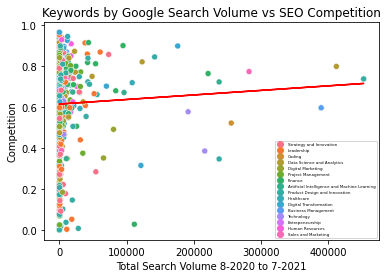

In [179]:
fig, ax = plt.subplots()

#creating scatterplot with Competition coefficient on the x-axis, total search volume for the data period on the y-axis,
#and with color coded points corresponding to the Emeritus topic the keyword was generated from
sns.scatterplot(data=sumsdf3, x="Total Monthly Search Volume", y="Competition", hue="Topic")

plt.legend(loc="best", fontsize=4, fancybox=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 6})
plt.title("Keywords by Google Search Volume vs SEO Competition")
plt.xlabel("Total Search Volume 8-2020 to 7-2021")
plt.ylabel("Competition")
#plt.ylim([30000, 200000])
#plt.figure(figsize=(8,5)) 
    
#finding slope and intercept for linear regression, which is plotted in red
y=sumsdf3["Competition"]
x=sumsdf3["Total Monthly Search Volume"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

#save figure as PNG
plt.savefig("AllDataSearchVolumeVSCompetition.png")


# Keywords with potential

In [180]:
#find examples of keywords in the top 40 with competition coefficient below 0.6
#this results in a list of potential keywords to run ads on
leads = top40[top40['Competition'] <= 0.6]
leads

,Keyword,Topic,Competition,SearchVolume
3,course of business management,Finance,0.595765,389400
4,courses in business management,Business Management,0.595765,389400
6,coding courses,Coding,0.521308,255700
7,course of designing,Product Design and Innovation,0.346076,237700
10,courses with certificate,Technology,0.384892,216300
11,online certificate,Technology,0.576369,191600
15,diploma certificate,Digital Transformation,0.314537,121400
16,degree diploma,Finance,0.027682,111600
21,training digital marketing,Digital Marketing,0.490719,80700
24,strategies of online marketing,Digital Marketing,0.350800,65800


# Presentation can be found here: https://prezi.com/i/clh3tejpw_ri/